In [10]:
from Bio import SeqIO
from math import log2
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def new_alignments(file_flag=None):
    if file_flag == 'r' or file_flag is None:
        al_h1 = open('new_alignments/H1.fasta')
        al_h2a = open('new_alignments/H2A.fasta')
        al_h2b = open('new_alignments/H2B.fasta')
        al_h3 = open('new_alignments/H3.fasta')
        al_h4 = open('new_alignments/H4.fasta')
    elif file_flag == 'w':
        al_h1 = open('new_alignments/H1.fasta', 'w')
        al_h2a = open('new_alignments/H2A.fasta', 'w')
        al_h2b = open('new_alignments/H2B.fasta', 'w')
        al_h3 = open('new_alignments/H3.fasta', 'w')
        al_h4 = open('new_alignments/H4.fasta', 'w')
    else:
        print('error')
    files = [al_h1, al_h2a, al_h2b, al_h3, al_h4]
    return files

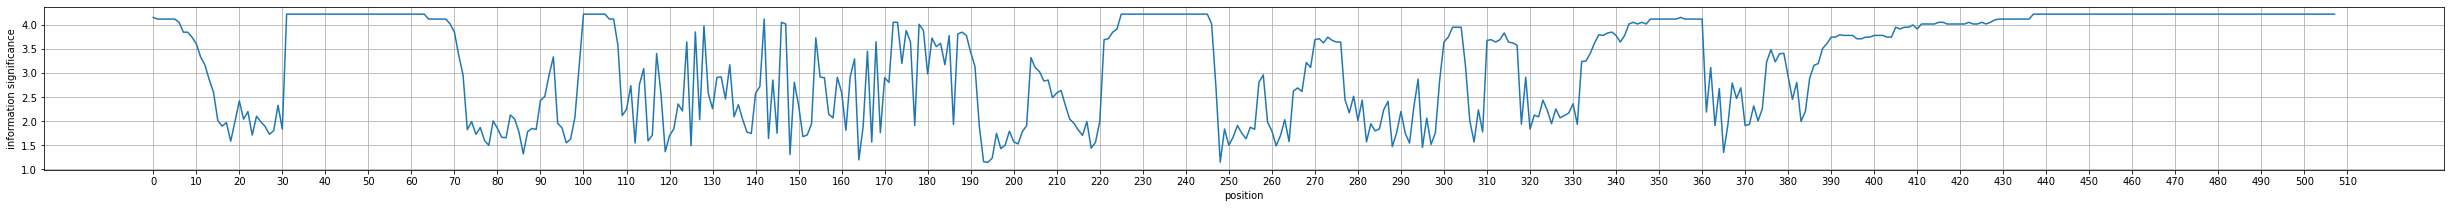

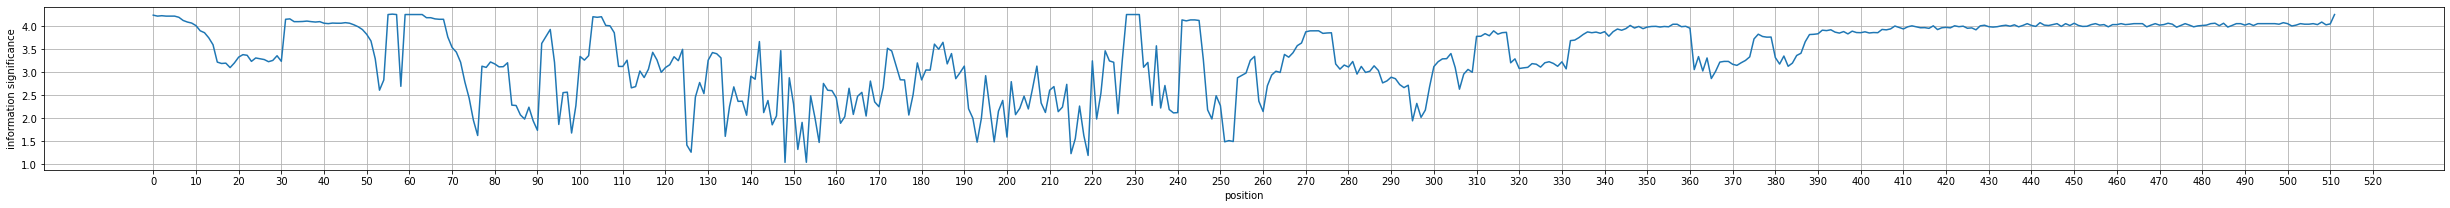

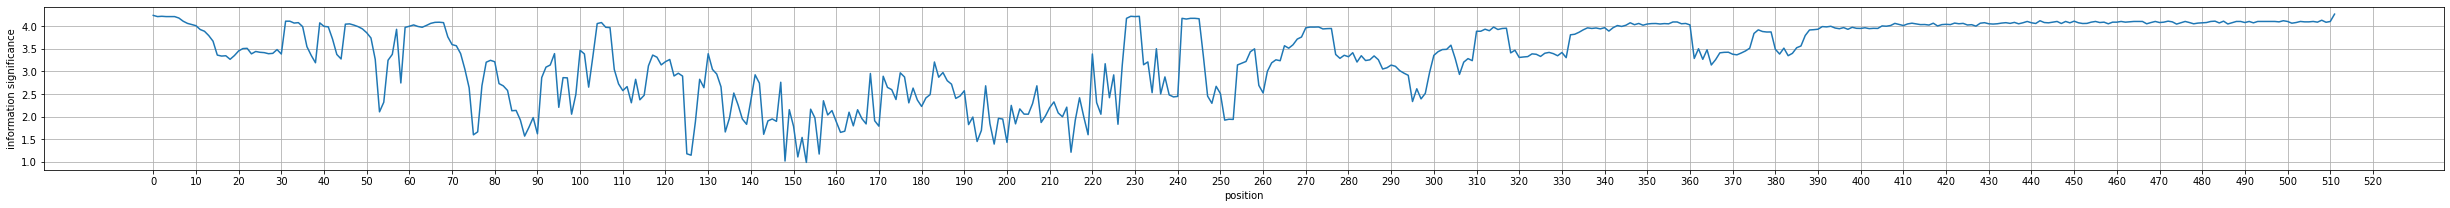

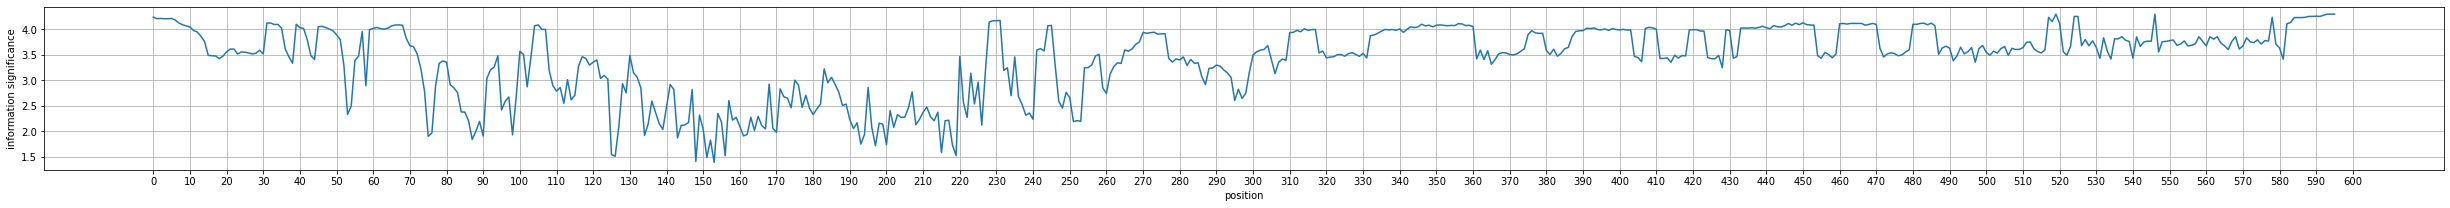

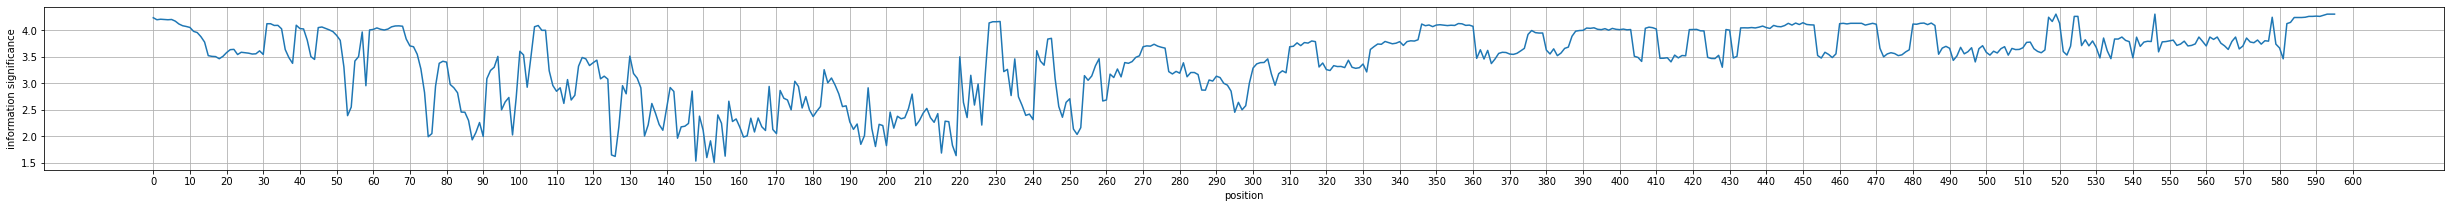

In [15]:
freq_list = []

for his_file in new_alignments():
    for record in SeqIO.parse(his_file, 'fasta'):
        cur_seq = record.seq
        for i in range(len(cur_seq)):
            if i >= len(freq_list):
                freq_list.append(dict())
            cur_res = cur_seq[i]
            cur_dict = freq_list[i]
            if cur_res in cur_dict:
                cur_dict[cur_res] += 1
            else:
                cur_dict[cur_res] = 1
                
    sum_values = sum(freq_list[0].values())
    entropy = [0 for i in range(len(freq_list))]

    for i in range(len(freq_list)):
        freq_dict = freq_list[i]
        for key in freq_dict:
            if key != '-':
                prob = freq_dict[key] / sum_values
                entropy[i] -= prob * log2(prob)  
                
    fig = plt.figure(figsize=(43, 3))
    inf_sign = list(map(lambda x: log2(20) - x, entropy))
    positions = range(len(entropy))
    plt.xlabel('position')
    plt.ylabel('information significance')
    plt.xticks(range(0, len(inf_sign) + 10, 10))
    plt.grid()
    plt.plot(positions, inf_sign)
    plt.show()